<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Pitch-of-a-GRIN-lens" data-toc-modified-id="Pitch-of-a-GRIN-lens-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pitch of a GRIN lens</a></span><ul class="toc-item"><li><span><a href="#Quarter-Pitch" data-toc-modified-id="Quarter-Pitch-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Quarter Pitch</a></span></li><li><span><a href="#Half-Pitch" data-toc-modified-id="Half-Pitch-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Half Pitch</a></span></li></ul></li><li><span><a href="#Index-of-Refraction-Across-Lens" data-toc-modified-id="Index-of-Refraction-Across-Lens-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Index of Refraction Across Lens</a></span><ul class="toc-item"><li><span><a href="#Parabolic-Profile" data-toc-modified-id="Parabolic-Profile-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Parabolic Profile</a></span></li><li><span><a href="#Hyperbolic-Secant-Profile" data-toc-modified-id="Hyperbolic-Secant-Profile-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Hyperbolic Secant Profile</a></span></li></ul></li><li><span><a href="#Catalog-Examples" data-toc-modified-id="Catalog-Examples-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Catalog Examples</a></span><ul class="toc-item"><li><span><a href="#Grin-Lens-from-ancient-Melles-Griot-Catalog,-4.67-line-2" data-toc-modified-id="Grin-Lens-from-ancient-Melles-Griot-Catalog,-4.67-line-2-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Grin Lens from ancient Melles Griot Catalog, 4.67 line 2</a></span></li><li><span><a href="#Grin-Lens-from-ancient-Melles-Griot-Catalog,-4.67-line-5" data-toc-modified-id="Grin-Lens-from-ancient-Melles-Griot-Catalog,-4.67-line-5-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Grin Lens from ancient Melles Griot Catalog, 4.67 line 5</a></span></li><li><span><a href="#Riedl,-page-96" data-toc-modified-id="Riedl,-page-96-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Riedl, page 96</a></span></li></ul></li><li><span><a href="#Grin-Lenses-at-Oregon-Tech" data-toc-modified-id="Grin-Lenses-at-Oregon-Tech-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Grin Lenses at Oregon Tech</a></span><ul class="toc-item"><li><span><a href="#Oriel-41425" data-toc-modified-id="Oriel-41425-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Oriel 41425</a></span></li><li><span><a href="#Oriel-41440" data-toc-modified-id="Oriel-41440-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Oriel 41440</a></span></li><li><span><a href="#Newport-FK---GR29" data-toc-modified-id="Newport-FK---GR29-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Newport FK - GR29</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import pygrin as grin

# Pitch of a GRIN lens

A gradient index (GRIN) lens is characterized by a sinusoidal ray path along the lens.  A lens is typically characterized its **pitch** or the number of sinusoidal periods within the lens.  

If the pitch is one (or an integer) then the grin lens acts as a relay and reproduces the light incident on the entrance surface at the exit surface.  A half-pitch inverts the pattern.  A quarter-pitch lens will collimate a point source or focus a collimated incident beam.


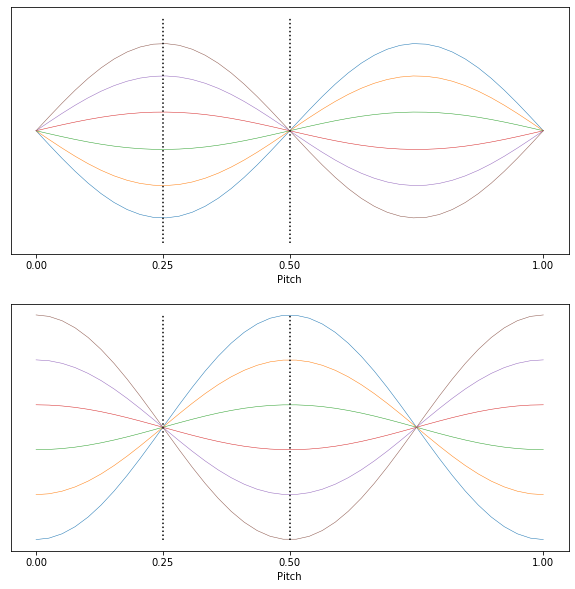

In [2]:
n0 = 1.608              # centerline index of refraction
length = 1              # mm
diameter = 0.25            # mm
angle = 40*np.pi/180 # radians
xpos = 0
pitch = 1
radius = diameter/2

# max angle in air
max_angle = grin.max_angle(n0,pitch,length,diameter)
# range of launch angles
angles = np.linspace(-max_angle,max_angle,6)
# range of launch angles in grin lens
angles = np.arcsin(np.sin(angles/n0))

plt.subplots(2,1,figsize=(10,10))
plt.subplot(2,1,1)
for angle in angles:
    z,r = grin.meridional_curve(n0, pitch, length, xpos, angle)
    plt.plot(z,r, lw=0.5)

plt.plot([0.25*length,0.25*length],[-radius,radius],':k')
plt.plot([0.5*length,0.5*length],[-radius,radius],':k')

plt.xticks([0,0.25,0.5,1.0])
plt.yticks([])
plt.xlabel('Pitch')
plt.title('')

plt.subplot(2,1,2)
for xpos in np.linspace(-radius,radius,6):
    z,r = grin.meridional_curve(n0, pitch, length, xpos, 0)
    plt.plot(z,r, lw=0.5)

plt.plot([0.25*length,0.25*length],[-radius,radius],':k')
plt.plot([0.5*length,0.5*length],[-radius,radius],':k')

plt.xticks([0,0.25,0.5,1.0])
plt.yticks([])
plt.xlabel('Pitch')
plt.title('')

plt.show()


## Quarter Pitch

This is the typical example because collimated light is focused to a point, or conversely, a point source is collimated.  Here we see an example the former.

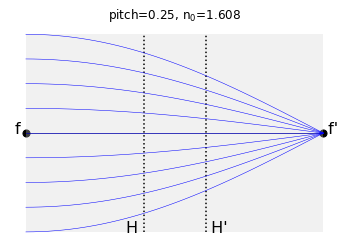

In [3]:
pitch = 0.25 
n0 = 1.608              # centerline index of refraction
length = 5              # mm
diameter = 2            # mm
angle = 0*np.pi/180     # radians

xplt = grin.principal_planes_plt(n0, pitch, length, diameter)
xpos = np.linspace(-diameter/2,diameter/2,9)
for pos in xpos:
    z,r = grin.meridional_curve(n0, pitch, length, pos, angle)
    xplt.plot(z,r, color='blue',lw=0.5)

xplt.rcParams["figure.figsize"] = [10,3]
xplt.axis('off')
xplt.show()

This shows light being collimated from a point source

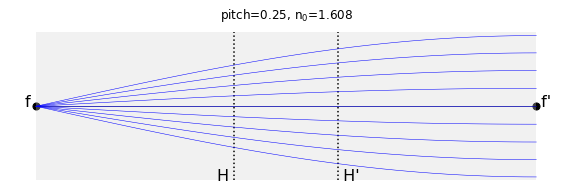

In [4]:
pitch = 0.25 
n0 = 1.608              # centerline index of refraction
length = 5              # mm
diameter = 2            # mm
xpos = 0                # mm

xplt = grin.principal_planes_plt(n0, pitch, length, diameter)

# max angle in air
max_angle = grin.max_angle(n0,pitch,length,diameter)
# range of launch angles
angles = np.linspace(-max_angle,max_angle,9)
# range of launch angles in grin lens
angles = np.arcsin(np.sin(angles/n0))

for angle in angles:
    z,r = grin.meridional_curve(n0, pitch, length, xpos, angle)
    xplt.plot(z,r, color='blue',lw=0.5)

xplt.rcParams["figure.figsize"] = [10,3]
xplt.axis('off')
xplt.show()

Here is a 4f system.  Here the source on the left is on focal distance from the front face and the 

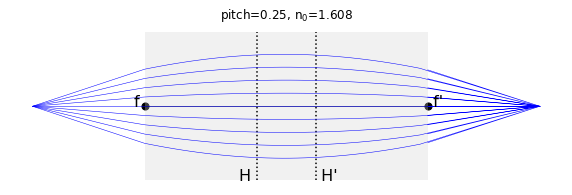

In [5]:
# 4f system
pitch = 0.25 
n0 = 1.608              # centerline index of refraction
length = 5              # mm
diameter = 2            # mm
zobj = grin.EFL(n0,pitch,length)
xpos = np.linspace(-diameter/4,diameter/4,9)

xplt = grin.principal_planes_plt(n0, pitch, length, diameter)

for pos in xpos:
    z,r = grin.full_meridional_curve(n0, pitch, length, -zobj, 0.0, pos)
    xplt.plot(z,r, color='blue',lw=0.5)

xplt.rcParams["figure.figsize"] = [10,3]
xplt.axis('off')
xplt.show()

Finally, this shows that collimated light incident at an angle on the lens will be imaged to a point off-axis.

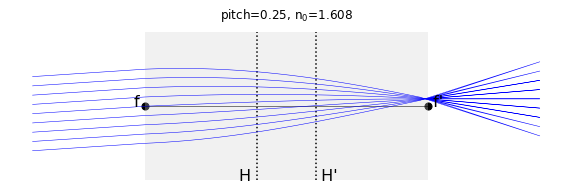

In [6]:
# off axis launch
pitch = 0.25 
n0 = 1.608              # centerline index of refraction
length = 5           # mm
diameter = 2          # mm
zobj = grin.EFL(n0,pitch,length)
xpos = np.linspace(-diameter/4,diameter/4,9)

xplt = grin.principal_planes_plt(n0, pitch, length, diameter)

for pos in xpos:
    z,r = grin.full_meridional_curve(n0, pitch, length, -zobj, pos-0.1, pos)
    xplt.plot(z,r, color='blue',lw=0.5)

xplt.rcParams["figure.figsize"] = [10,3]
xplt.axis('off')
xplt.show()

## Half Pitch

Here we show that all the rays hitting the front surface at a point are imaged to the same point on the exit surface --- but inverted.  

The prinicipal planes are not drawn because the effective focal length is infinite.

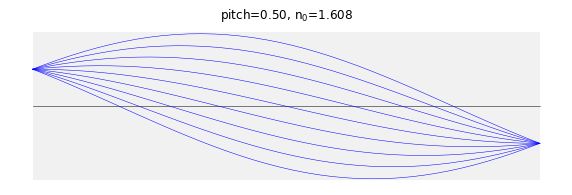

In [7]:
pitch = 0.5 
n0 = 1.608              # centerline index of refraction
length = 5              # mm
diameter = 2            # mm
xpos = 0.5                # mm

xplt = grin.principal_planes_plt(n0, pitch, length, diameter)

# max angle in air
max_angle = grin.max_angle(n0,pitch,length,diameter)
# range of launch angles
angles = np.linspace(-max_angle,max_angle,9)
# range of launch angles in grin lens
angles = np.arcsin(np.sin(angles/n0))

for angle in angles:
    z,r = grin.meridional_curve(n0, pitch, length, xpos, angle)
    xplt.plot(z,r, color='blue',lw=0.5)

xplt.rcParams["figure.figsize"] = [10,3]
xplt.axis('off')
xplt.show()

# Index of Refraction Across Lens

## Parabolic Profile

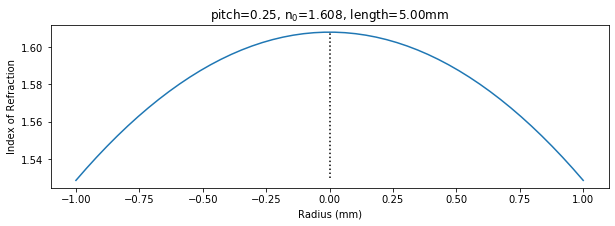

In [8]:
n0 = 1.608
pitch = 0.25
length = 5    # mm
diameter = 2 
r = np.linspace(-diameter/2,diameter/2,50)

plt.plot(r,grin.parabolic_profile_index(n0,pitch,length,r))
plt.plot([0,0],[1.53,n0],':k')
plt.xlabel('Radius (mm)')
plt.ylabel('Index of Refraction')
plt.title(r'pitch=%.2f, n$_0$=%.3f, length=%.2fmm'%(pitch,n0,length))
xplt.rcParams["figure.figsize"] = [6,4]

plt.show()

## Hyperbolic Secant Profile

This has a few advantages over the parabolic profile: the propagation for a HS grin lens can be solved exactly and there aren't any aberrations for meridional rays.

As you can see below, the HS profile can be quite close to the parabolic profile.

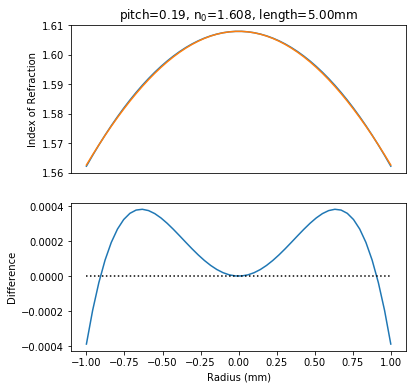

In [9]:
n0 = 1.608
pitch = 0.19
length = 5    # mm
diameter = 2 
gradient = grin.gradient(pitch,length)
alpha = 1.303*gradient

r = np.linspace(-diameter/2,diameter/2,50)

plt.subplots(2,1, sharex=True,figsize=(6,6))
plt.subplot(2,1,1)
n_p = grin.parabolic_profile_index(n0,pitch,length,r)
n_s = grin.hyperbolic_secant_profile_index(n0,alpha,r)
plt.plot(r,n_p)
plt.plot(r,n_s)
plt.xticks([])
plt.ylabel('Index of Refraction')
plt.title(r'pitch=%.2f, n$_0$=%.3f, length=%.2fmm'%(pitch,n0,length))
xplt.rcParams["figure.figsize"] = [6,4]

plt.subplot(2,1,2)
plt.plot(r,n_p-n_s)

plt.xlabel('Radius (mm)')
plt.ylabel('Difference')
plt.plot([-1,1],[0,0],':k')

plt.show()

# Catalog Examples

## Grin Lens from ancient Melles Griot Catalog, 4.67 line 2

Part number LGS-0.25-1.0-2.58-633

In [10]:
n = 1.608 
gradient = 0.608 
length = 2.58
diameter = 1

pitch = grin.period(gradient, length)
print('expected pitch = 0.25,           calculated %.2f'%pitch)

efl = grin.EFL(n,pitch,length)
na = grin.NA(n,pitch,length,diameter)
print('expected NA = 0.46,              calculated %.2f'%na)

angle = grin.max_angle(n,pitch,length,diameter)
print('expected full accept angle = 55°, calculated %.0f°'%(2*angle*180/np.pi))

expected pitch = 0.25,           calculated 0.25
expected NA = 0.46,              calculated 0.46
expected full accept angle = 55°, calculated 54°


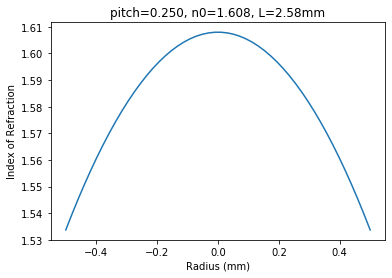

In [11]:
r = np.linspace(-0.5,0.5,50)
plt.plot(r,grin.parabolic_profile_index(n,pitch,length,r))
plt.xlabel('Radius (mm)')
plt.ylabel('Index of Refraction')
plt.title('pitch=%.3f, n0=%.3f, L=%.2fmm'%(pitch,n,length))
plt.show()

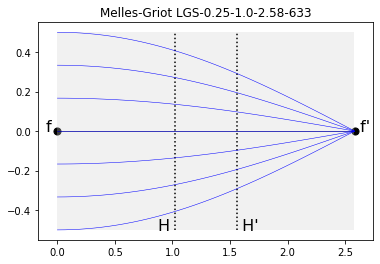

In [12]:
xplt = grin.principal_planes_plt(n, pitch, length, diameter)
xpos = np.linspace(-diameter/2,diameter/2,7)
for pos in xpos:
    z,r = grin.meridional_curve(n, pitch, length, pos, 0*np.pi/180)
    xplt.plot(z,r, color='blue',lw=0.5)

xplt.title('Melles-Griot LGS-0.25-1.0-2.58-633')
xplt.show()

## Grin Lens from ancient Melles Griot Catalog, 4.67 line 5

Part number LGE-0.29-1.8-5.37-633

In [23]:
n = 1.608 
gradient = 0.339 
length = 5.37
diameter = 1.8

pitch = grin.period(gradient, length)
print('expected pitch = 0.29,            calculated %.2f'%pitch)

ffl = grin.FFL(n,pitch,length)
efl = grin.EFL(n,pitch,length)
print('expected FFL = 0.46,              calculated %.2f'%ffl)

na = grin.NA(n,pitch,length,diameter)
print('expected NA = 0.46,               calculated %.2f'%na)

angle = grin.max_angle(n,pitch,length,diameter)
print('expected full accept angle = 55°, calculated %.0f°'%(2*angle*180/np.pi))

print('working distance = %.2f mm'%(efl-ffl))

expected pitch = 0.29,            calculated 0.29
expected FFL = 0.46,              calculated 0.47
expected NA = 0.46,               calculated 0.46
expected full accept angle = 55°, calculated 55°
working distance = 1.43 mm


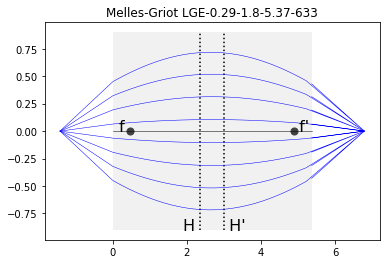

In [14]:
xplt = grin.principal_planes_plt(n, pitch, length, diameter)
xpos = np.linspace(-diameter/4, diameter/4,8)
for pos in xpos:
    z,r = grin.full_meridional_curve(n, pitch, length, ffl-efl, 0, pos)
    xplt.plot(z,r, color='blue', lw=0.5)

xplt.title('Melles-Griot LGE-0.29-1.8-5.37-633')

xplt.show()

## Riedl, page 96


In [15]:
n = 1.5834
gradient = np.sqrt(0.1067)
length = 4
diameter = 1.8

pitch = grin.period(gradient, length)
print('expected pitch = 0.207,          calculated %.3f'%pitch)

efl = grin.EFL(n,pitch,length)
print('expected EFL = 2.00,             calculated %.2f'%efl)

ffl = grin.FFL(n,pitch,length)
print('expected FFL = -0.52,            calculated %.2f'%ffl)

bfl = grin.BFL(n,pitch,length)
print('expected BFL = 4.52,             calculated %.2f'%bfl)

na = grin.NA(n,pitch,length,diameter)
print('expected NA = 0.46,              calculated %.2f'%na)

angle = grin.max_angle(n,pitch,length,diameter)
print('expected full accept angle = 55°, calculated %.0f°'%(2*angle*180/np.pi))

print('working distance = %.2f mm'%(-ffl+efl))

expected pitch = 0.207,          calculated 0.208
expected EFL = 2.00,             calculated 2.00
expected FFL = -0.52,            calculated -0.52
expected BFL = 4.52,             calculated 4.52
expected NA = 0.46,              calculated 0.44
expected full accept angle = 55°, calculated 52°
working distance = 2.53 mm


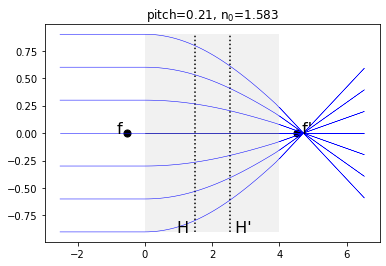

In [16]:
xplt = grin.principal_planes_plt(n, pitch, length, diameter)
xpos = np.linspace(-diameter/2, diameter/2,7)
for pos in xpos:
    z,r = grin.full_meridional_curve(n, pitch, length, ffl-efl, pos, pos)
    xplt.plot(z,r, color='blue', lw=0.5)

xplt.show()

# Grin Lenses at Oregon Tech

## Oriel 41425
Designed for 632.8nm

In [17]:
n = 1.608
pitch = 0.25
length = 6.28
diameter = 2

gradient = grin.gradient(pitch, length)
print('expected gradient = 0.250,        calculated %.3f'%pitch)

efl = grin.EFL(n,pitch,length)
#print('expected EFL = 2.00,              calculated %.2f'%efl)

ffl = grin.FFL(n,pitch,length)
#print('expected FFL = -0.52,             calculated %.2f'%ffl)

bfl = grin.BFL(n,pitch,length)
#print('expected BFL = 4.52,              calculated %.2f'%bfl)

na = grin.NA(n,pitch,length,diameter)
print('expected NA = 0.38,               calculated %.2f'%na)

angle = grin.max_angle(n,pitch,length,diameter)
print('expected full accept angle = 45°, calculated %.0f°'%(2*angle*180/np.pi))

print('working distance = %.2f mm'%(efl-ffl))

expected gradient = 0.250,        calculated 0.250
expected NA = 0.38,               calculated 0.38
expected full accept angle = 45°, calculated 45°
working distance = 2.49 mm


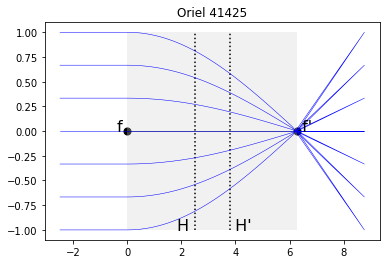

In [18]:
xplt = grin.principal_planes_plt(n, pitch, length, diameter)
xpos = np.linspace(-diameter/2, diameter/2,7)
for pos in xpos:
    z,r = grin.full_meridional_curve(n, pitch, length, ffl-efl, pos, pos)
    xplt.plot(z,r, color='blue', lw=0.5)

xplt.title('Oriel 41425')

xplt.show()

## Oriel 41440
Designed for 632.8nm

In [19]:
n = 1.608
pitch = 0.29
length = 5.35
diameter = 2

gradient = grin.gradient(pitch, length)
print('expected gradient = 0.290,        calculated %.3f'%pitch)

efl = grin.EFL(n,pitch,length)
#print('expected EFL = 2.00,              calculated %.2f'%efl)

ffl = grin.FFL(n,pitch,length)
#print('expected FFL = -0.52,             calculated %.2f'%ffl)

bfl = grin.BFL(n,pitch,length)
#print('expected BFL = 4.52,              calculated %.2f'%bfl)

na = grin.NA(n,pitch,length,diameter)
print('expected NA = 0.38,               calculated %.2f'%na)

angle = grin.max_angle(n,pitch,length,diameter)
print('expected full accept angle = 60°, calculated %.0f°'%(2*angle*180/np.pi))

print('working distance = %.2f mm'%(efl-ffl))

expected gradient = 0.290,        calculated 0.290
expected NA = 0.38,               calculated 0.50
expected full accept angle = 60°, calculated 60°
working distance = 1.42 mm


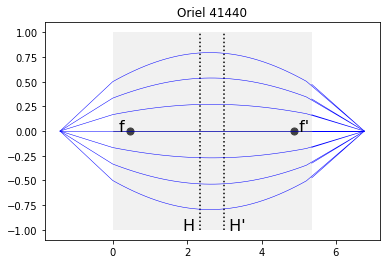

In [20]:
xplt = grin.principal_planes_plt(n, pitch, length, diameter)
xpos = np.linspace(-diameter/4, diameter/4,7)
for pos in xpos:
    z,r = grin.full_meridional_curve(n, pitch, length, ffl-efl, 0, pos)
    xplt.plot(z,r, color='blue', lw=0.5)

xplt.title('Oriel 41440')
xplt.show()

## Newport FK - GR29
Designed for 850nm

In [21]:
n = 1.608
pitch = 0.29
length = 5.49
diameter = 1.8

gradient = grin.gradient(pitch, length)
print('expected gradient = 0.290,        calculated %.3f'%pitch)

efl = grin.EFL(n,pitch,length)
print('expected EFL = 1.95,              calculated %.2f'%efl)

ffl = grin.FFL(n,pitch,length)
#print('expected FFL = -0.52,             calculated %.2f'%ffl)

bfl = grin.BFL(n,pitch,length)
#print('expected BFL = 4.52,              calculated %.2f'%bfl)

na = grin.NA(n,pitch,length,diameter)
print('expected NA = 0.46,               calculated %.2f'%na)

angle = grin.max_angle(n,pitch,length,diameter)
print('expected full accept angle = 60°, calculated %.0f°'%(2*angle*180/np.pi))

print('working distance = %.2f mm'%(efl-ffl))

expected gradient = 0.290,        calculated 0.290
expected EFL = 1.95,              calculated 1.93
expected NA = 0.46,               calculated 0.45
expected full accept angle = 60°, calculated 53°
working distance = 1.45 mm


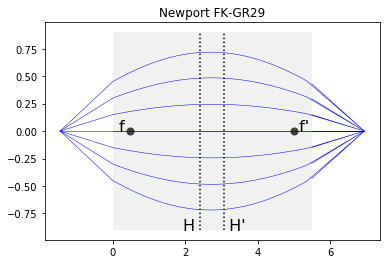

In [22]:
xplt = grin.principal_planes_plt(n, pitch, length, diameter)
xpos = np.linspace(-diameter/4, diameter/4,7)
for pos in xpos:
    z,r = grin.full_meridional_curve(n, pitch, length, ffl-efl, 0, pos)
    xplt.plot(z,r, color='blue', lw=0.5)

xplt.title('Newport FK-GR29')
xplt.show()